<a href="https://colab.research.google.com/github/atefar2/DAD-CORP-LLC/blob/master/SHOW_ME_DA_MONEY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install pandas
!pip install numpy
!pip install matplotlib
#!pip install quandl
!pip install statsmodels 
#!pip install gs_quant
!pip install pandas-ta
!pip install finta
#!pip install alpha_vantage
!pip install pandas-datareader
!pip install --upgrade ta
!pip install -U scikit-learn
!pip install scipy
!pip install hmmlearn==0.2.3


Requirement already up-to-date: ta in /usr/local/lib/python3.6/dist-packages (0.5.17)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22.2.post1)


In [2]:

import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import pandas_datareader.data as web
import datetime
#import quandl
import statsmodels.api as sm
#import gs_quant as gs
#import gs_quant.timeseries as ts
#from gs_quant.timeseries import Window
import os
import pandas_ta as ta
import finta as tia
#import alpha_vantage as av
#from alpha_vantage.timeseries import TimeSeries
#from alpha_vantage.techindicators import TechIndicators
import ta as uta 
#https://github.com/bukosabino/ta

import scipy as sp

import hmmlearn
from hmmlearn.hmm import GaussianHMM


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# HIDDEN MARKOV MODEL

####https://github.com/theJollySin/scipy_con_2019/blob/master/modern_time_series_analysis/ModernTimeSeriesAnalysis/StateSpaceModels/2_Gaussian_HMM_INSTRUCTOR.ipynb

In [0]:


#https://github.com/je-suis-tm/quant-trading

#QUANDL_api_key = 'qpmUo-eN7ZiNgAL1FUj6'
#alpha_key = 'QJLSTP496N8PKUIO'


#quandl.ApiConfig.api_key = 'qpmUo-eN7ZiNgAL1FUj6'
#mydata = quandl.get('WIKI/APPL')
#mydata.head()

In [0]:


#quandl.ApiConfig.api_key = 'qpmUo-eN7ZiNgAL1FUj6'
#mydata = quandl.get('WIKI/APPL')
#mydata.head()

TRY THE NEW GRID TICK
https://stackoverflow.com/questions/24943991/change-grid-interval-and-specify-tick-labels-in-matplotlib

In [114]:

%matplotlib inline
plt.style.use(style='ggplot')
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2020,4,9)

spy = web.DataReader('spy','yahoo',start,end,)
#gush = web.DataReader('gush','yahoo',start,end,)
#drip = web.DataReader('drip','yahoo',start,end,)
#gasl = web.DataReader('gasl','yahoo',start,end,)
#gasx = web.DataReader('gasx','yahoo',start,end,)
#uwt = web.DataReader('uwt','yahoo',start,end,)
#dwt = web.DataReader('dwt','yahoo',start,end,)
#ovx = web.DataReader('^ovx','yahoo',start,end,)
vix = web.DataReader('^vix','yahoo',start,end,)
spy5 = web.DataReader('^GSPC','yahoo',start,end,)
#soxl = web.DataReader('soxl','yahoo',start,end,)
#dust = web.DataReader('dust','yahoo',start,end,)
#nugt = web.DataReader('nugt','yahoo',start,end,)
#jdst = web.DataReader('jdst','yahoo',start,end,)
#jnug = web.DataReader('jnug','yahoo',start,end,)

tickers = ['spy','gush','drip','gasl','gasx','uwt','dwt',
           '^ovx','^vix','^GSPC','soxl','dust','nugt','jdst','jnug',]

porto = web.DataReader(tickers, 'yahoo',start,end,)


porto_daily_return = porto['Close'].pct_change()

(porto_daily_return + 1).cumprod().plot(figsize = (30,15))
plt.legend(loc='upper left')

plt.show()

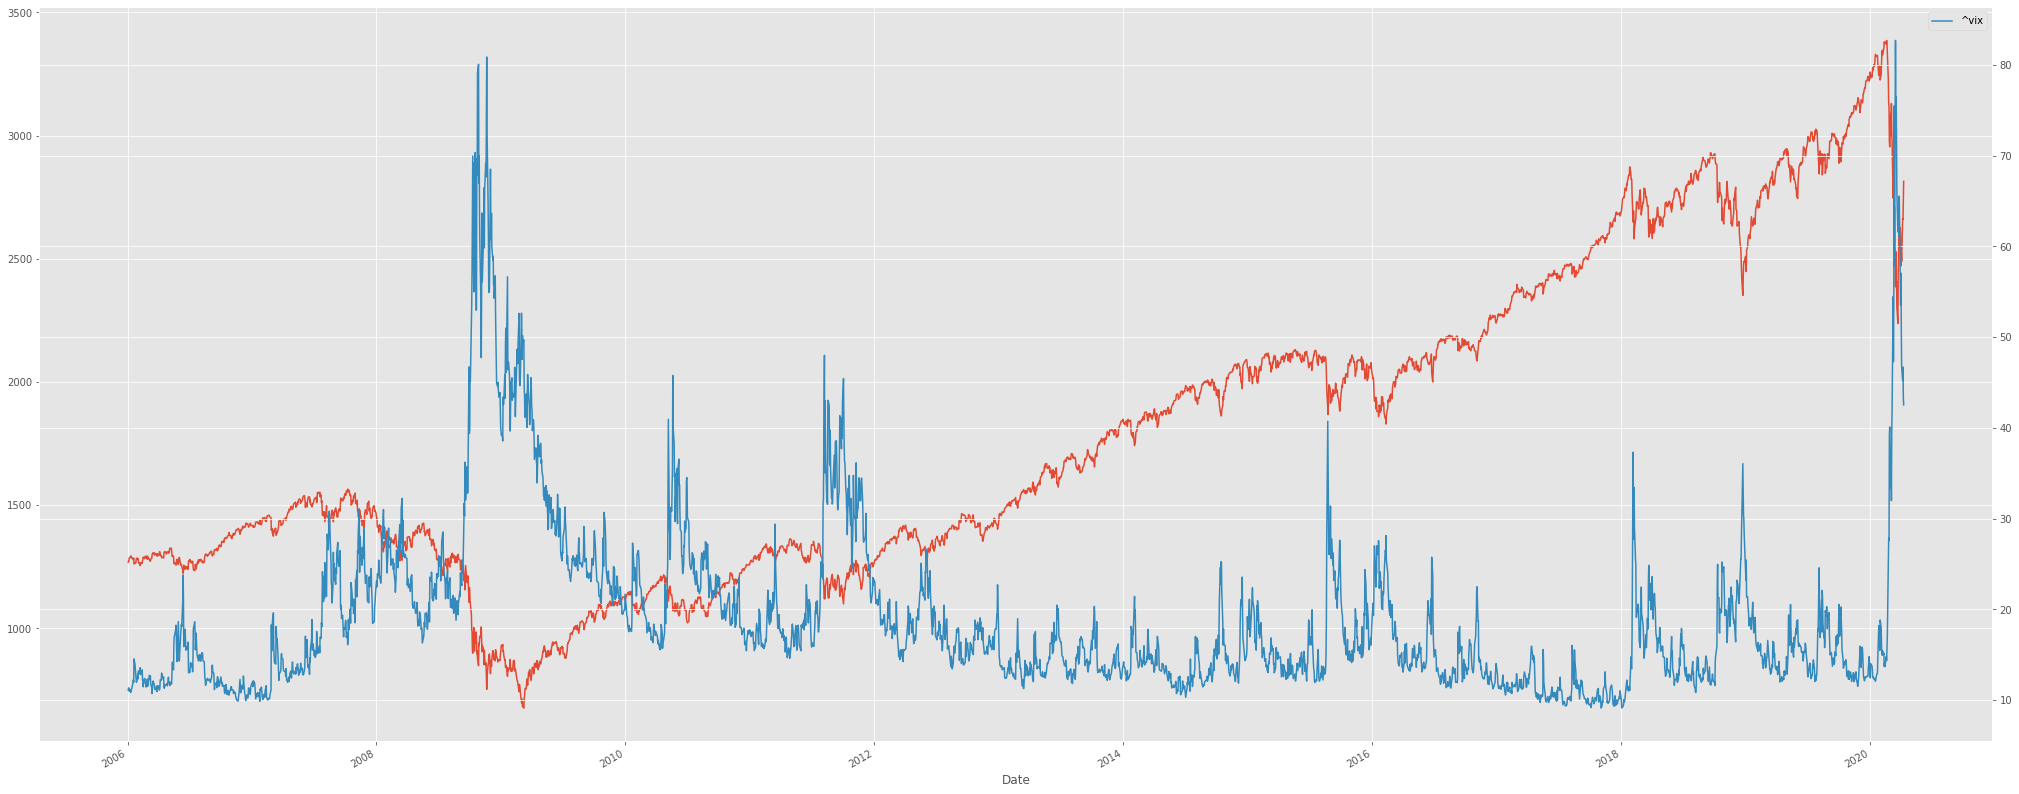

In [115]:
%matplotlib inline
plt.style.use('ggplot')

spy5.Close.plot(label= '^GSPC',figsize=(35,15),secondary_y=False,grid = True)
#ovx.Close.plot(label= '^ovx',figsize=(35,15),secondary_y=False)
#spy.Close.plot(label= 'spy',figsize=(35,15),secondary_y=False)
vix.Close.plot(label= '^vix',figsize=(35,15),secondary_y=True,grid = True)
#gush.Close.plot(label= 'gush',figsize=(35,15),secondary_y=False)
##gasl.Close.plot(label= 'gasl',figsize=(35,15),secondary_y=False)
#gasx.Close.plot(label= 'gasx',figsize=(35,15),secondary_y=False)
#drip.Close.plot(label= 'drip',figsize=(35,15),secondary_y=False)
#uwt.Close.plot(label= 'uwt',figsize=(35,15),secondary_y=True)
#dwt.Close.plot(label= 'dwt',figsize=(35,15),secondary_y=False)
#soxl.Close.plot(label= 'soxl',figsize= (35,15),secondary_y=False,)
#dust.Close.plot(label= 'dust',figsize= (35,15),secondary_y=False)
#jdst.Close.plot(label= 'jdst',figsize= (35,15),secondary_y=False)
#nugt.Close.plot(label= 'nugt',figsize= (35,15),secondary_y=False)
#jnug.Close.plot(label= 'jnug',figsize= (35,15),secondary_y=False)
#porto.Close.plot(figsize=(35,15),secondary_y=False)
#plt.grid(b=None, which='major',axis='both',)      

plt.legend()
plt.show()


In [116]:
spy5.dropna(inplace=True)
spy5.index = pd.to_datetime(spy5.index)

spy5.Close.plot(label= 'close',figsize= (35,15),secondary_y=False,)
spy5.High.plot(label= 'high',figsize= (35,15),secondary_y=False,)
spy5.Low.plot(label= 'low',figsize= (35,15),secondary_y=False,)
spy5.Open.plot(label= 'open',figsize= (35,15),secondary_y=False,)
plt.legend()

# Watson Studio Desktop is now free for academia

https://medium.com/ibm-watson/watson-studio-desktop-is-now-free-for-academia-f8b50a118370

In [0]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#olsmod = sm.OLS(spy5.Close,spy5.index,missing='none',hasconst=None,)



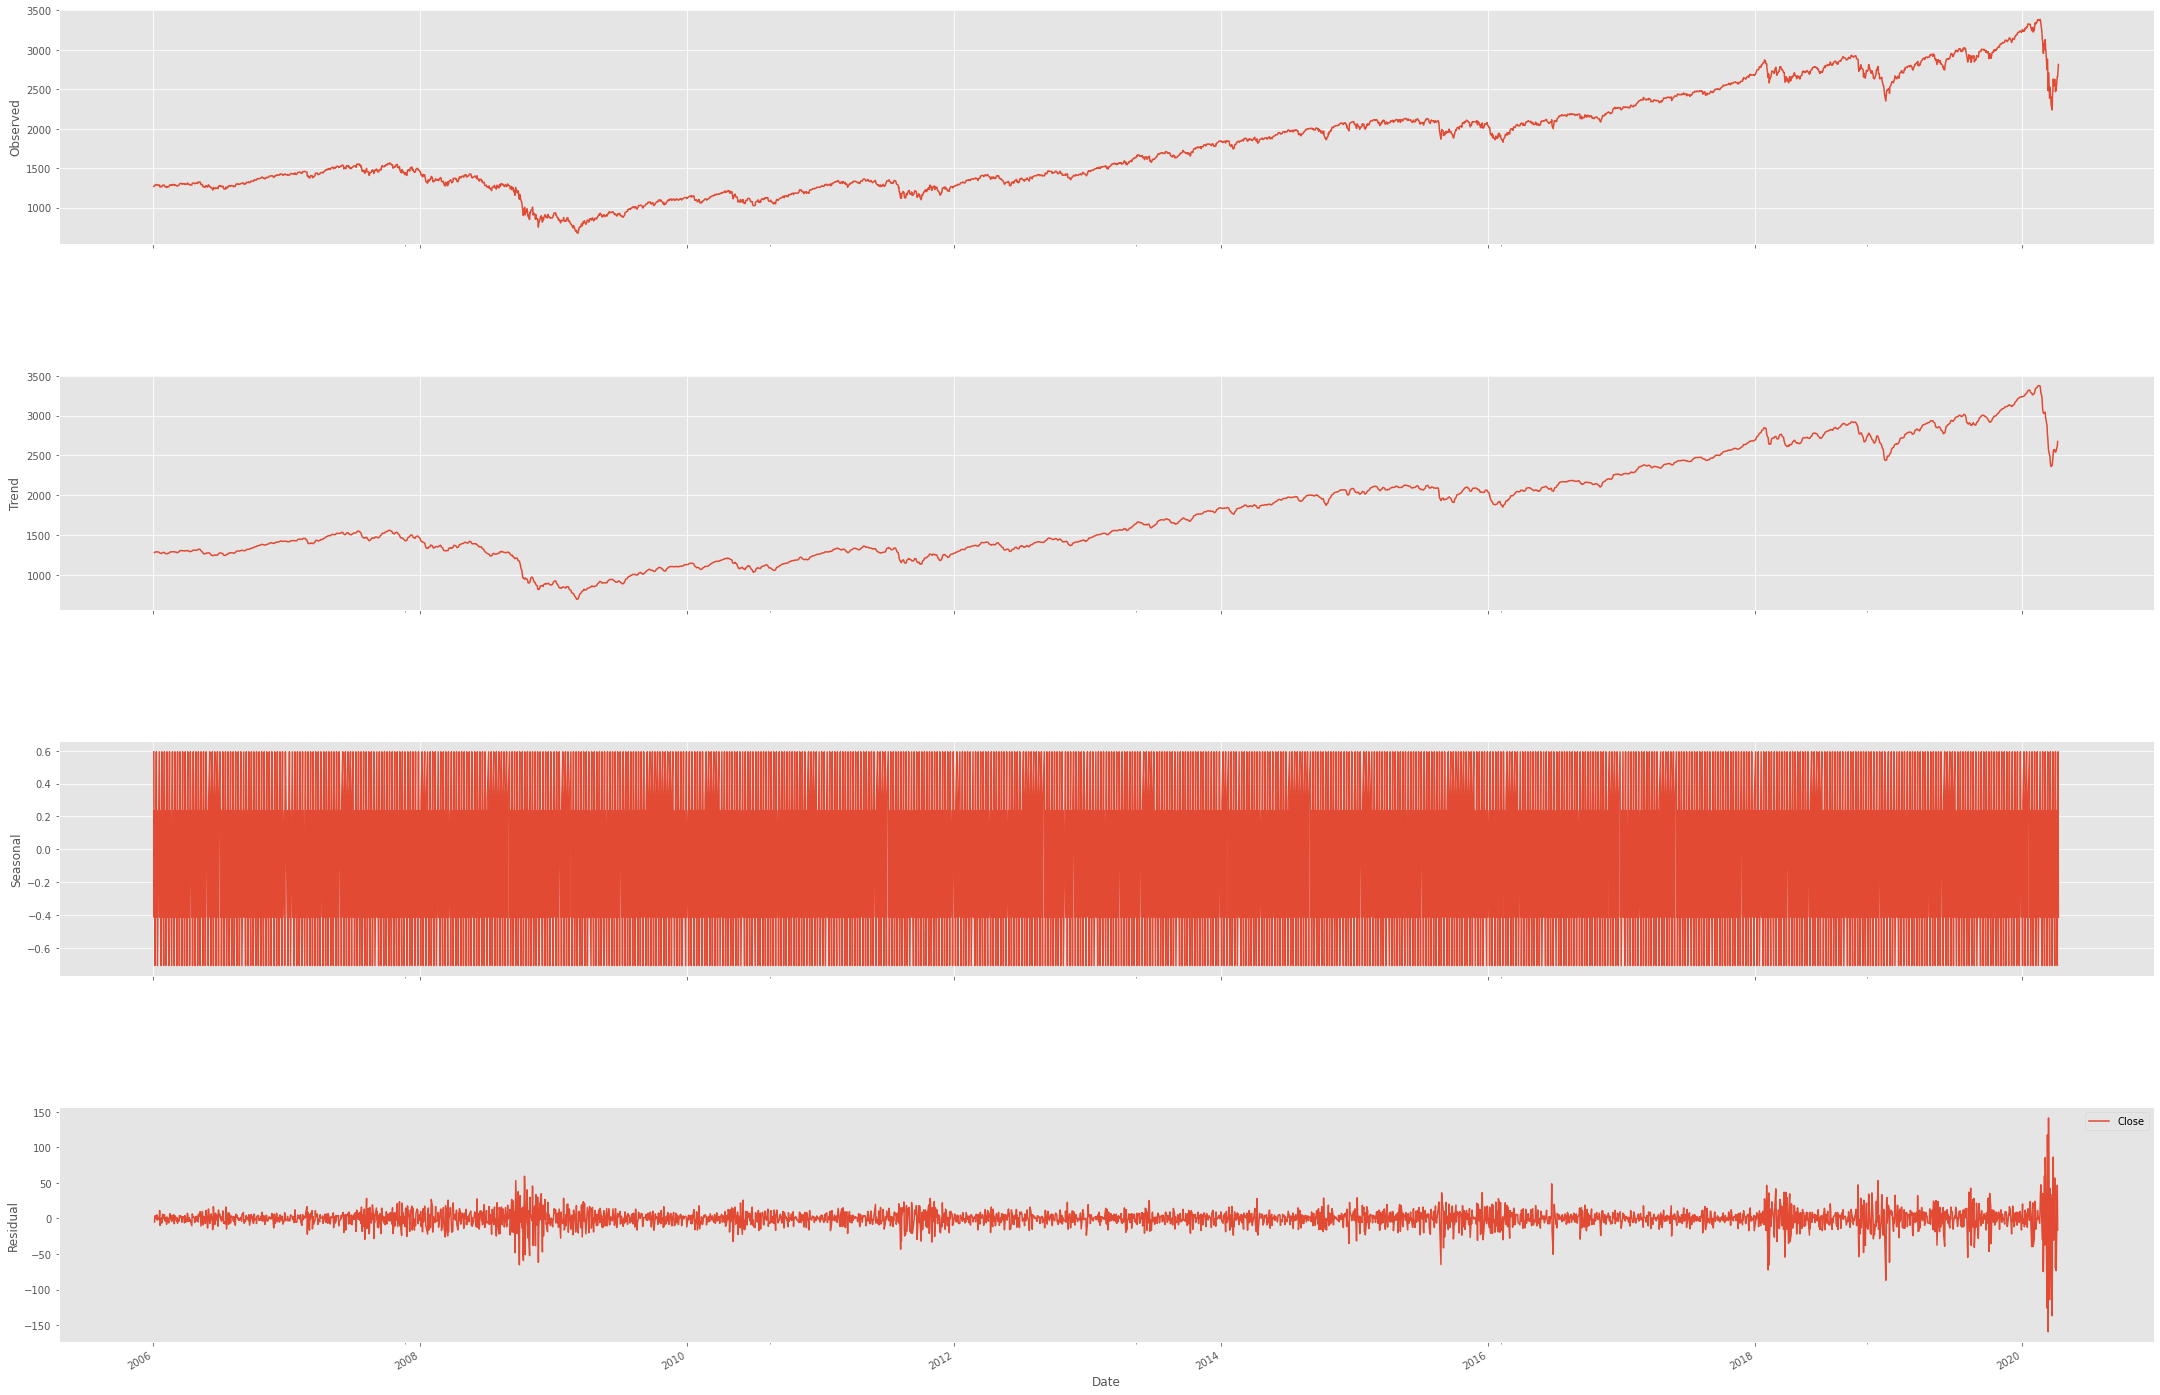

In [117]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(spy5.Close,model="additive",freq=5)

fig = result.plot()
plt.grid()
fig.set_size_inches(35,25)

plt.legend()

Date
2006-01-03            NaN
2006-01-04            NaN
2006-01-05    1278.267993
2006-01-06    1282.445972
2006-01-09    1286.589990
                 ...     
2020-04-03    2561.827930
2020-04-06    2617.723926
2020-04-07    2675.247949
2020-04-08            NaN
2020-04-09            NaN
Name: Close, Length: 3592, dtype: float64

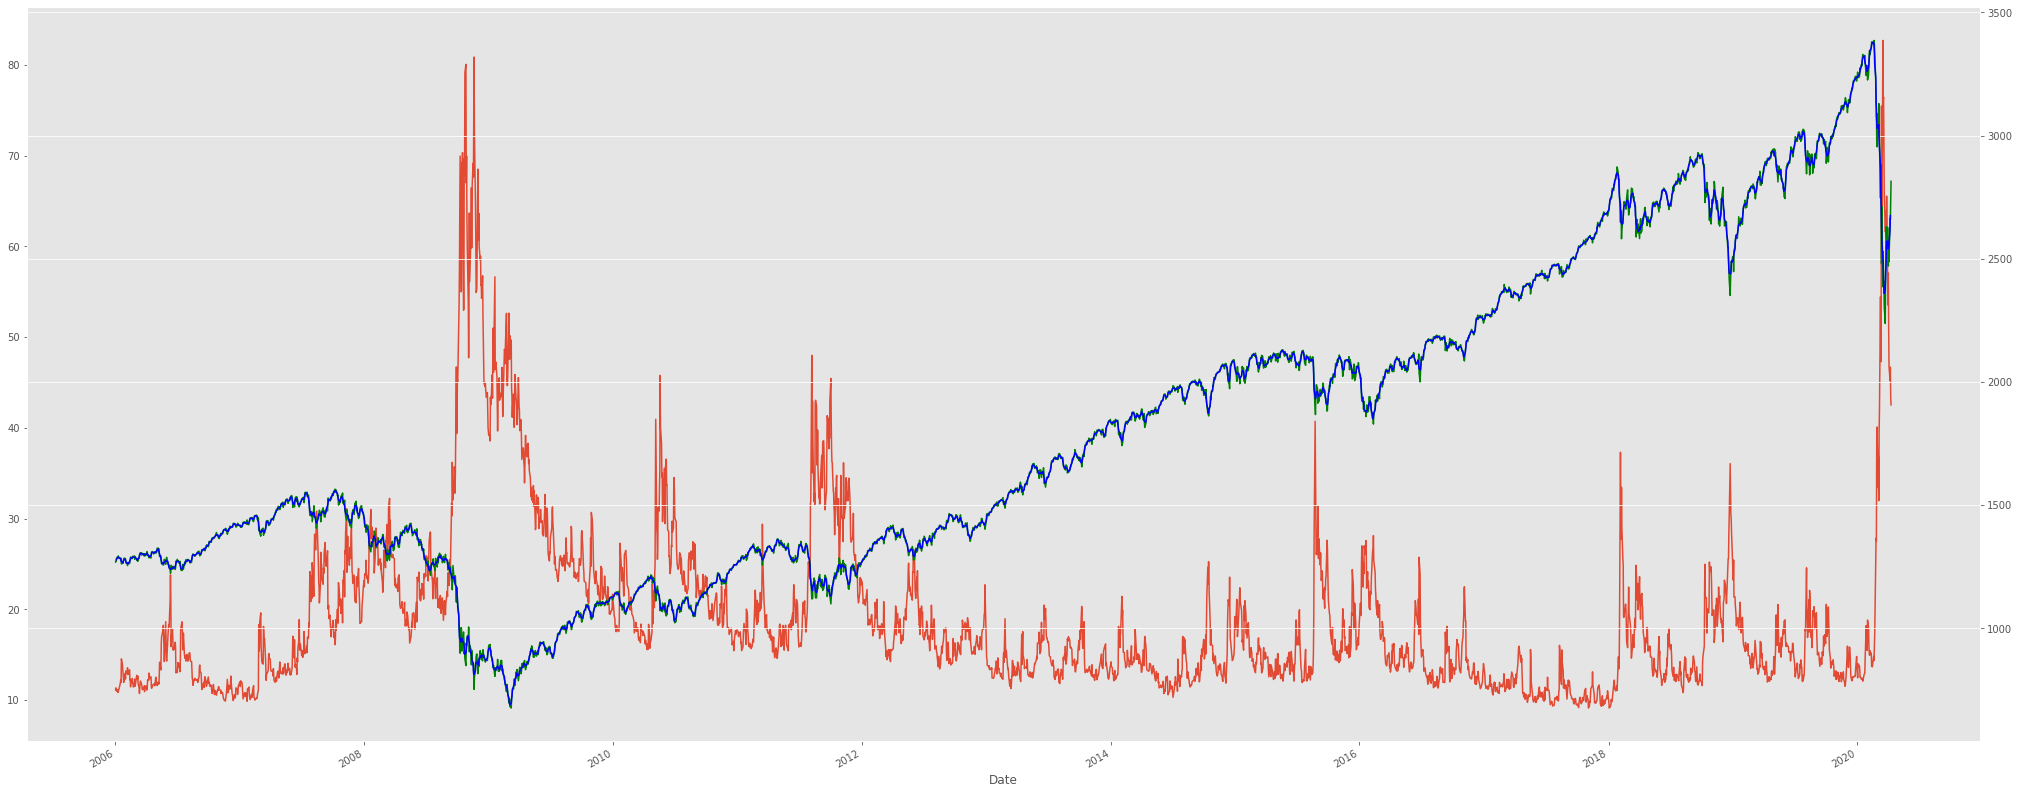

In [119]:
plt.figure()
plt.grid()


vix.Close.plot(label= '^vix',figsize=(35,15),secondary_y=False)
#spy.Close.plot(label= 'spy',figsize=(35,15),secondary_y=True, style='b')
spy5.Close.plot(label= 'spy5',figsize=(35,15),secondary_y=True, style='g',grid=True)
result.trend.plot(figsize=(35,15),secondary_y=True, style='b')

result.trend

**bold text*#https://github.com/peerchemist/finta/tree/master/examples*

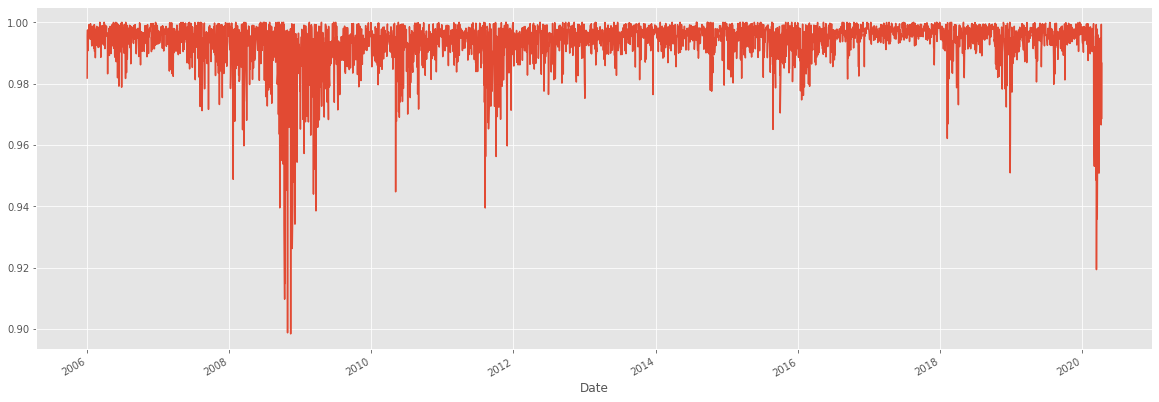

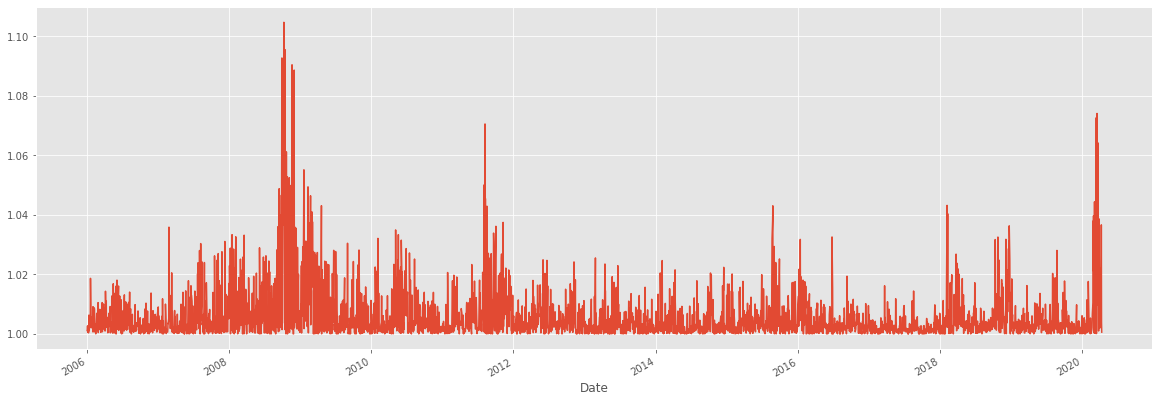

In [120]:
df = pd.DataFrame(spy5)

df['new'] = df['Low']/df['Adj Close']
df['new1'] = df['High']/df['Adj Close']

plt.show()
df.new.plot(figsize=(20,7))
plt.show()
df.new1.plot(figsize=(20,7))
plt.legend
plt.show()

In [0]:
spy5['hma'] = ta.hma(spy5['Close'], length=25)
spy5['hma2'] = ta.ema(spy5['Close'], length=20)
spy5['hma3'] = ta.ema(spy5['Close'], length=40)
spy5['hma4'] = ta.ema(spy5['Close'], length=50)
spy5['ema'] = ta.ema(spy5.Close, length=15)
spy5['fwma'] = ta.fwma(spy5['Close'],length=12,asc=True)
#spy5['stoch'] = uta.momentum.UltimateOscillator(spy5['High'],spy5['Low'],spy5['Close'],s=7,m=14,len=28,ws=4.0,wm=2.0,wl=1.0,fillna=False)
#spy5.stoch.plot()
#buy = [spy5['hma2'] > spy5['ema']]
#sell = [spy5['hma2'] < spy5['ema']]

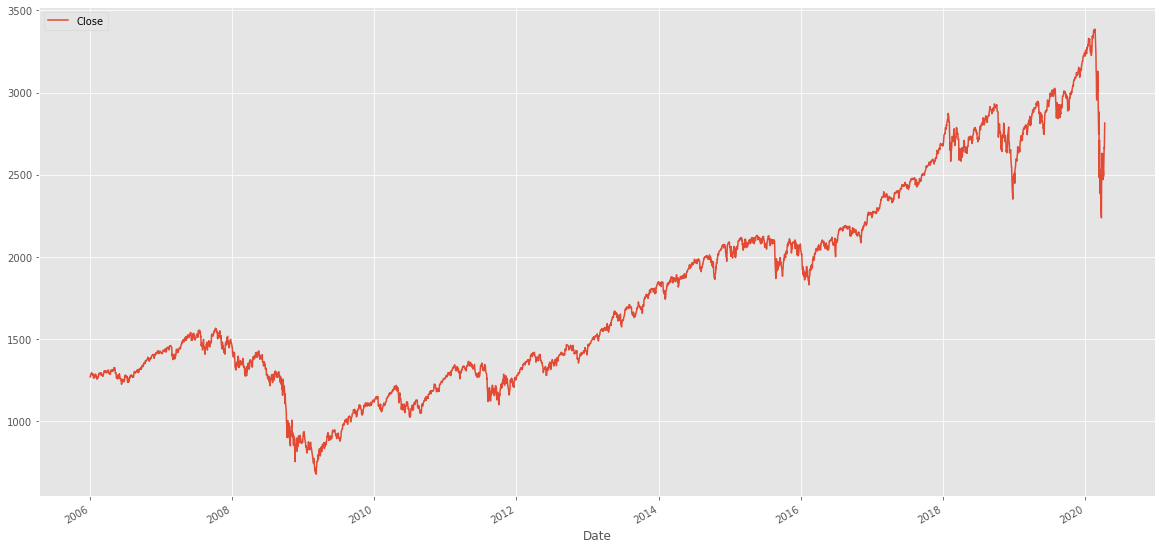

In [122]:
spy5.Close.plot(figsize=(20,10),secondary_y=False,)
#spy5.hma.plot()
#spy5.hma2.plot()
#spy5.hma3.plot()
#spy5.ema.plot()
#spy5.stoh.plot(figsize=(35,5),secondary_y=True,)
#spy5.fwma.plot()
#vix.Close.plot(secondary_y=True,)
#spy5.stoch.plot()
#plt.grid()
plt.legend()

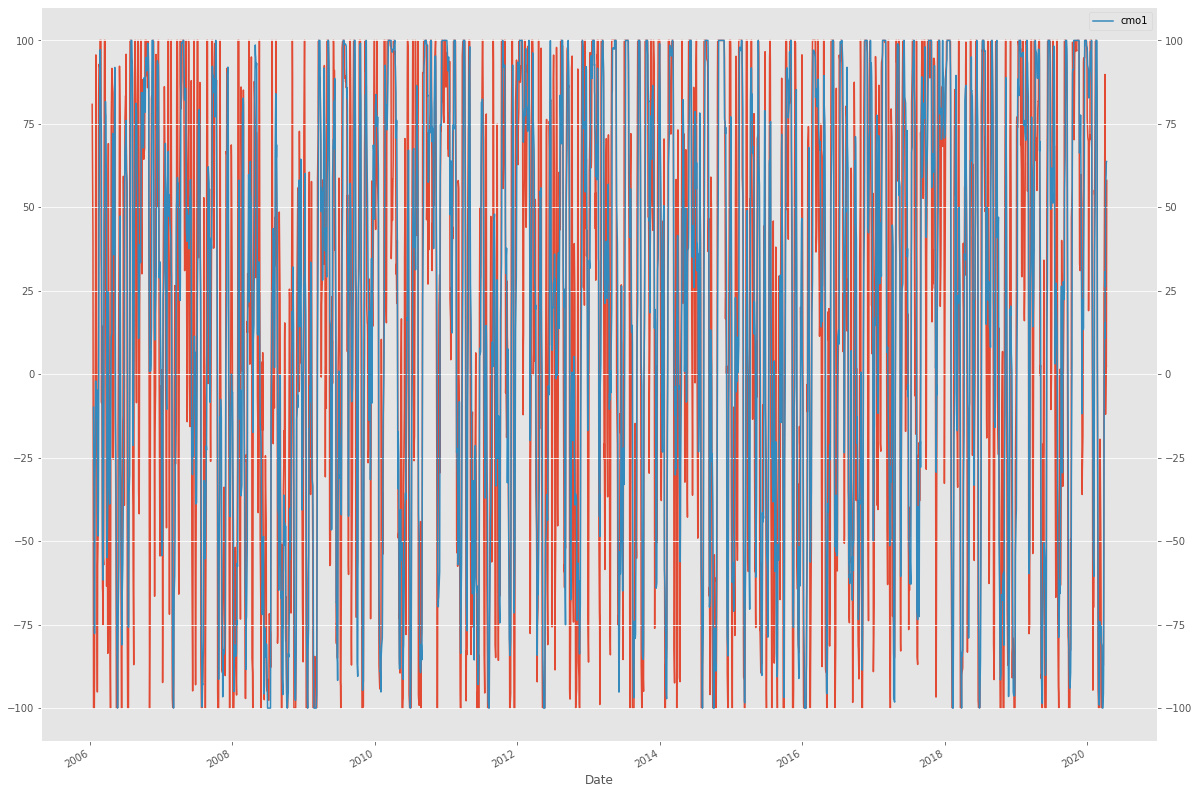

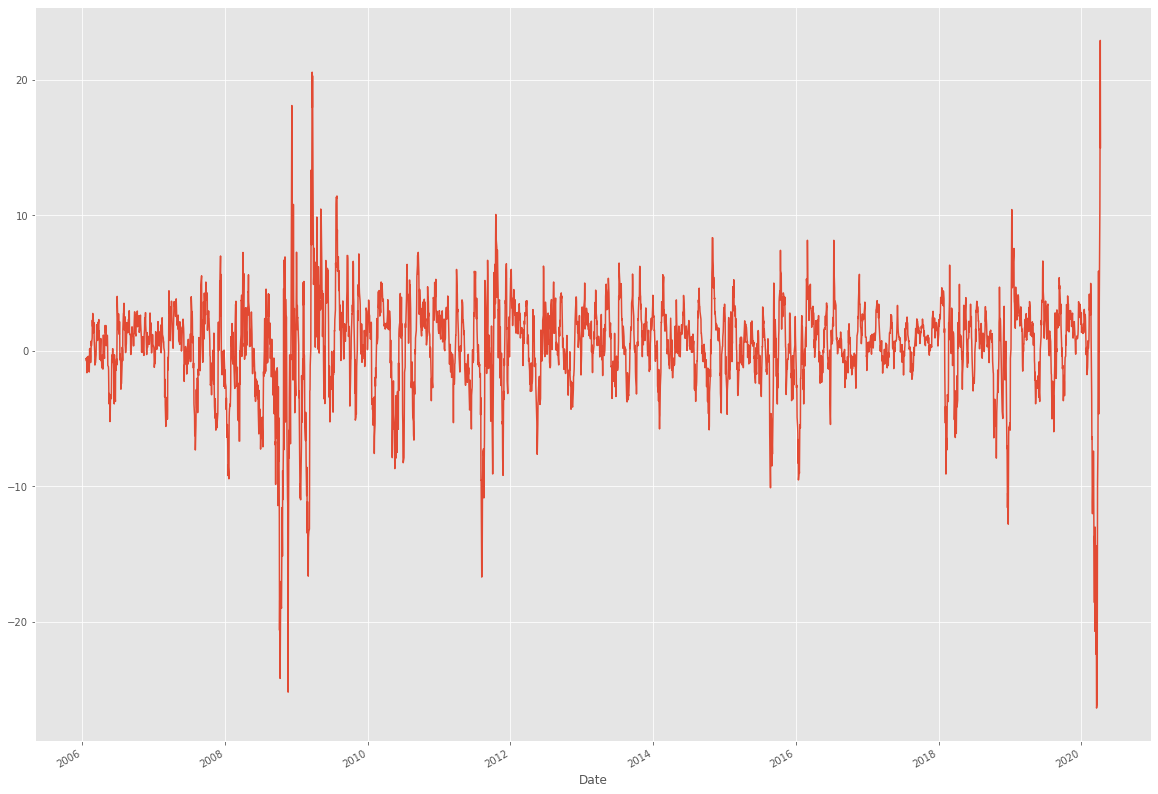

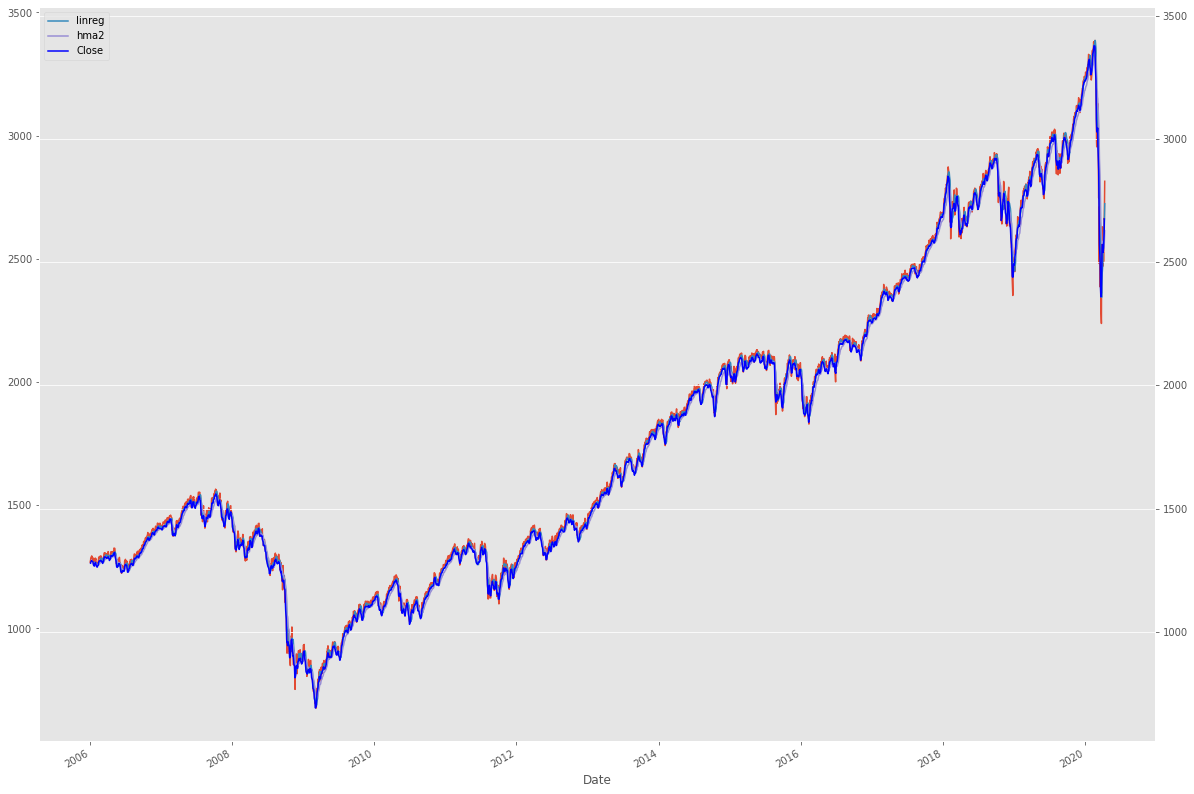

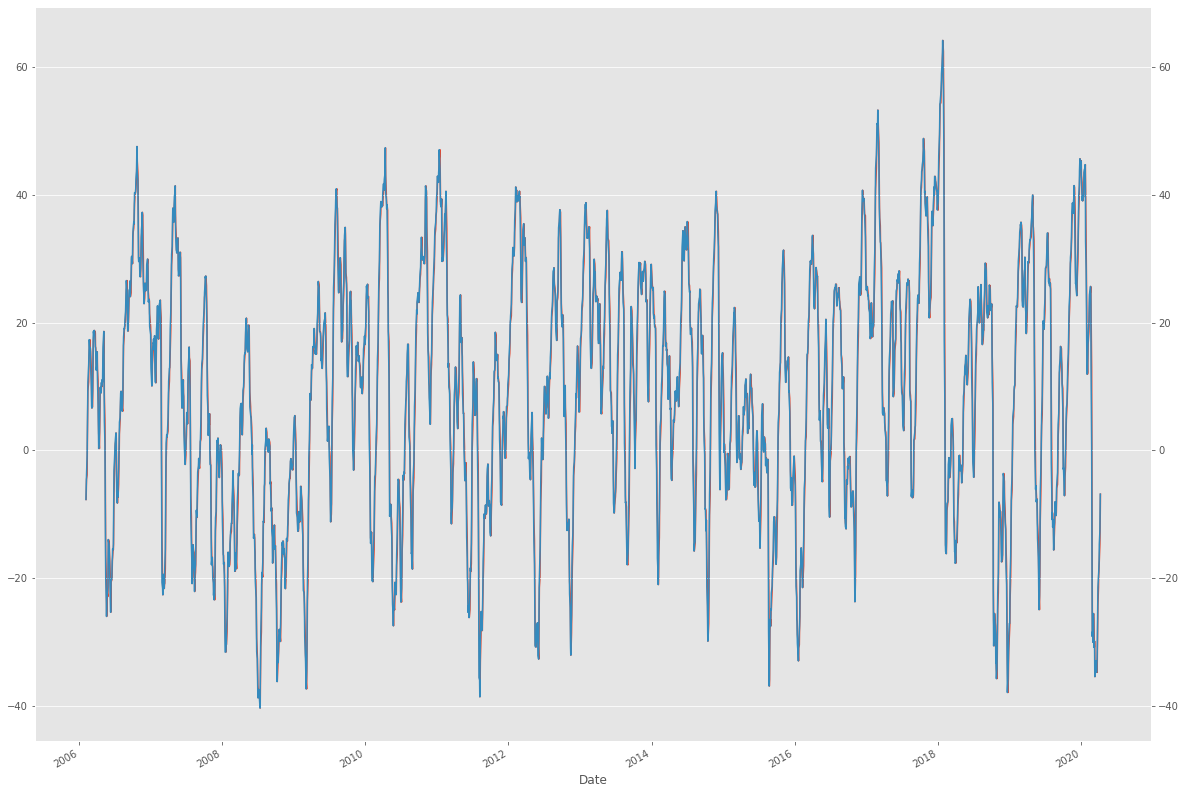

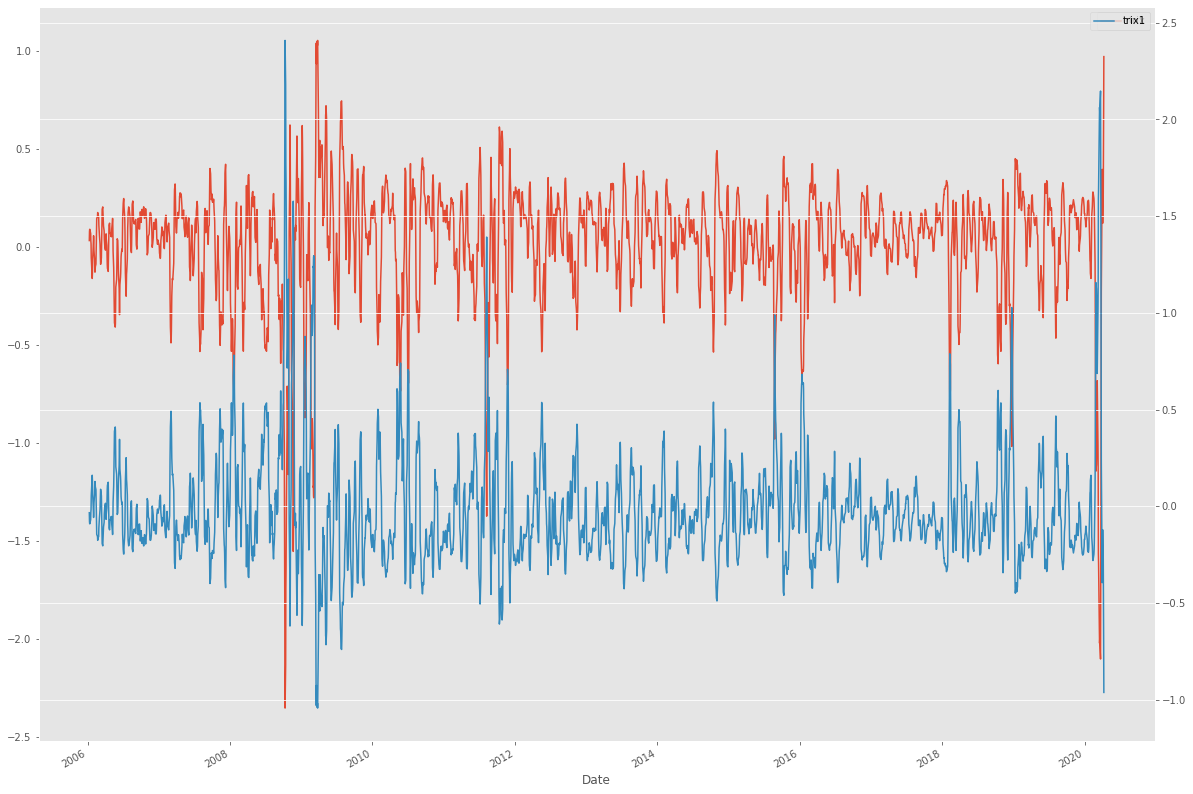

<bound method Series.count of Date
2006-01-03            NaN
2006-01-04            NaN
2006-01-05    1278.267993
2006-01-06    1282.445972
2006-01-09    1286.589990
                 ...     
2020-04-03    2561.827930
2020-04-06    2617.723926
2020-04-07    2675.247949
2020-04-08            NaN
2020-04-09            NaN
Name: Close, Length: 3592, dtype: float64>

In [123]:

spy5['cmo'] = ta.cmo(spy5['Close'],6,3,None)
spy5.cmo.plot(figsize=(20,15),);


spy5['cmo1'] = ta.cmo(spy5['Close'],10,4,-1)
spy5.cmo1.plot(figsize=(20,15),secondary_y=True,)

plt.legend();
plt.show()

spy5['roc'] = ta.roc(spy5['Close'],12,None,)
spy5.roc.plot(figsize=(20,15),)
plt.show()


spy5.Close.plot(figsize=(20,15),secondary_y=False,)

spy5['linreg'] = ta.linreg(spy5['High'],length=15,offset=None)
spy5.linreg.plot(figsize=(20,15),secondary_y=True,)

spy5['hma2'] = ta.ema(spy5['Close'], length=15)
spy5.hma2.plot(figsize=(20,15),secondary_y=True,)

result.trend.plot(figsize=(20,15),secondary_y=True, style='b')

plt.legend()

plt.show()

spy5['tsi'] = ta.tsi(spy5['Close'],13,25,1,None,)
spy5.tsi.plot(figsize=(20,15),secondary_y=False,);

spy5['tsi1'] = ta.tsi(spy5['Close'],13,25,1,-1,)
spy5.tsi1.plot(figsize=(20,15),secondary_y=True,);

plt.show()

#spy5['stoch'] = uta.momentum.StochasticOscillator(spy5['High'],spy5['Low'],spy5['Close'],n=14,d_n=3,fillna=False,)

#spy5.stoch.plot(figsize=(35,5),secondary_y=False,)
#plt.legend()

spy5['trix'] = ta.trix(spy5['Close'],5,1,None,)
spy5.trix.plot(figsize=(20,15),secondary_y=False,)
plt.legend()
spy5['trix1'] = ta.trix(spy5['Close'],5,-1,1,)
spy5.trix1.plot(figsize=(20,15),secondary_y=True,)
plt.legend()

plt.show()
result.trend.count


In [126]:
# R Squared
result.trend.dropna(inplace=True)
result.trend.index = pd.to_datetime(result.trend.index)
spy5R2 = web.DataReader('^GSPC','yahoo',start =datetime.datetime(2006,1,5),end=datetime.datetime(2020,4,7))

X = spy5R2.iloc[:,3:4].values
Y = result.trend.values

from sklearn.metrics import r2_score

sklearn.metrics.r2_score(Y,X,)


0.999561214462854

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


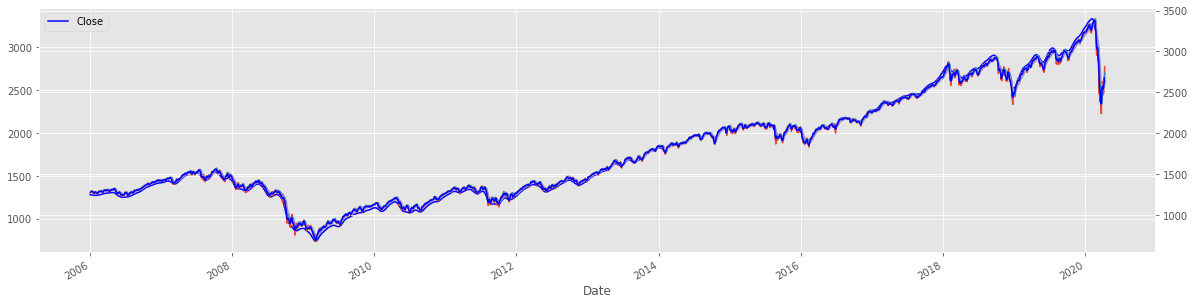

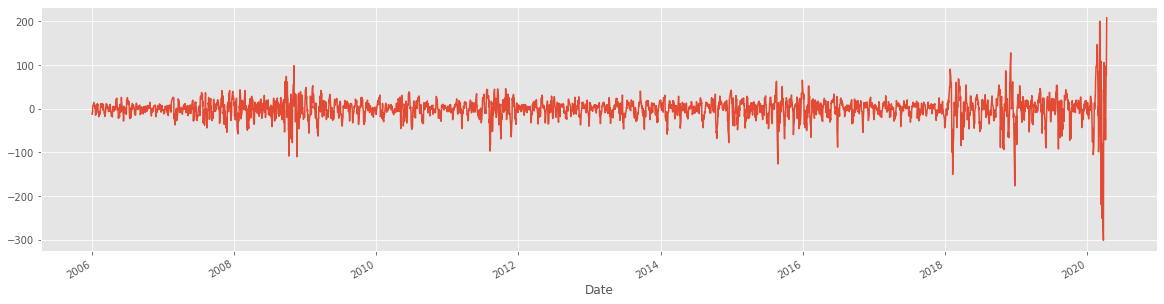

In [127]:
spy5cycle, spy5trend = sm.tsa.filters.hpfilter(spy5.Close,1600)

spy5_decomp = spy5.Close
spy5_decomp['cycle'] = spy5cycle
spy5_decomp['trend'] = spy5trend

spy5.Close.plot(figsize=(20,5),secondary_y=True,)

spy5['linreg'] = ta.linreg(spy5['High'],length=15,offset=None)
spy5.linreg.plot(figsize=(20,5),secondary_y=True,)

spy5['hma2'] = ta.ema(spy5['Close'], length=15)
spy5.hma2.plot(figsize=(20,5),secondary_y=True,)

result.trend.plot(figsize=(20,5),secondary_y=True, style='b')

plt.legend()


spy5_decomp.trend.plot(figsize=(20,5),style='b',secondary_y=False,)
plt.show()
spy5_decomp.cycle.plot(figsize=(20,5))
plt.show()

## WORK ON UTA STOCHASTIC TO PUT IN IBM WATSON

In [129]:
spy5_decomp.trend.head()

Date
2006-01-03    1281.536855
2006-01-04    1281.301688
2006-01-05    1281.058560
2006-01-06    1280.794609
2006-01-09    1280.492239
Name: Close, dtype: float64

In [131]:
# R Squared
spy5_decomp.trend.dropna(inplace=True)
spy5_decomp.trend.index = pd.to_datetime(spy5_decomp.trend.index)
spy5R2 = web.DataReader('^GSPC','yahoo',start =datetime.datetime(2006,1,3),end=datetime.datetime(2020,4,9))

X = spy5R2.iloc[:,3:4].values
Y = spy5_decomp.trend.values

from sklearn.metrics import r2_score

sklearn.metrics.r2_score(Y,X,)



0.9983815306470503

# HoW to download any data set. CSV OR ANY FILE TYPE

In [0]:
from google.colab import files

spy5.to_csv('spy5.csv')
#files.download('spy5.csv')


##ARIMA MODEL
#https://www.youtube.com/watch?v=tJ-O3hk1vRw&list=TLPQMTgwMzIwMjDVBlrxQ8iheA&index=3

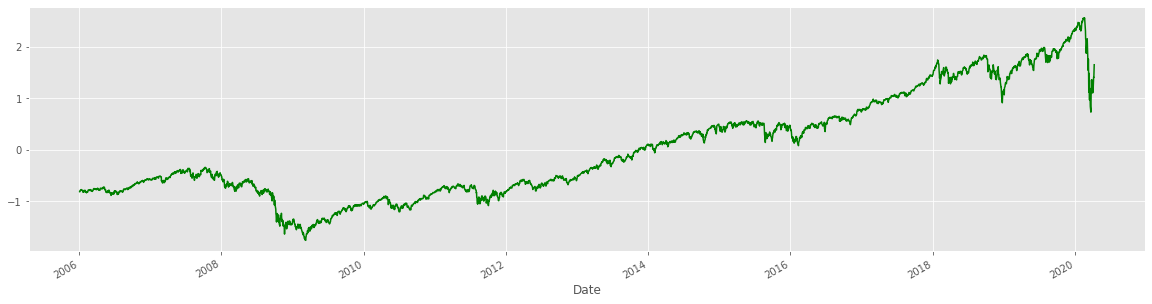

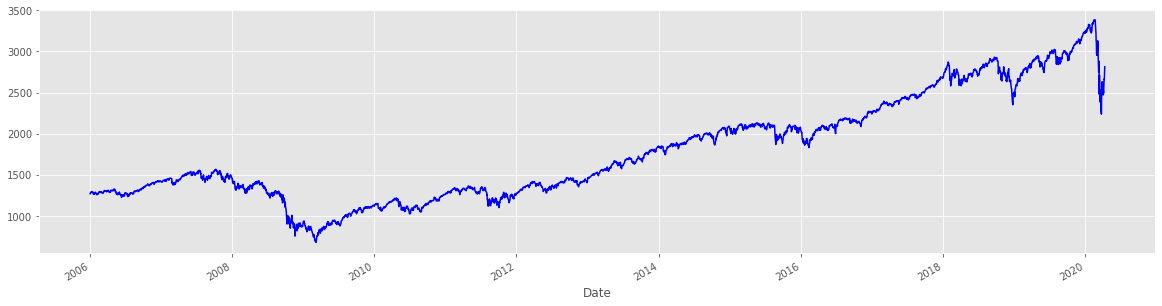

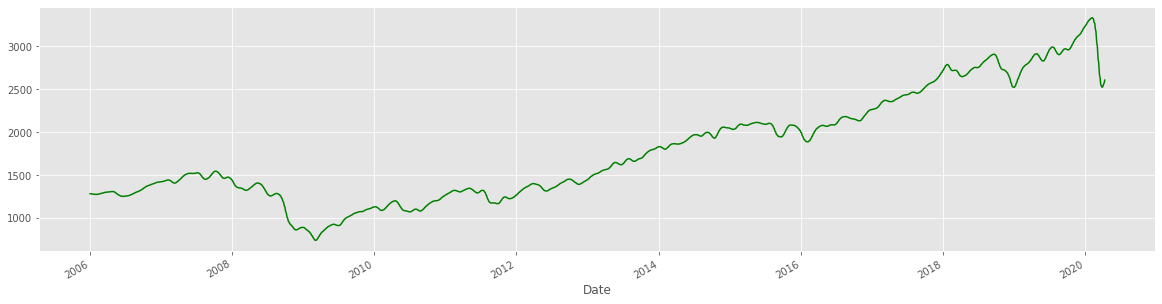

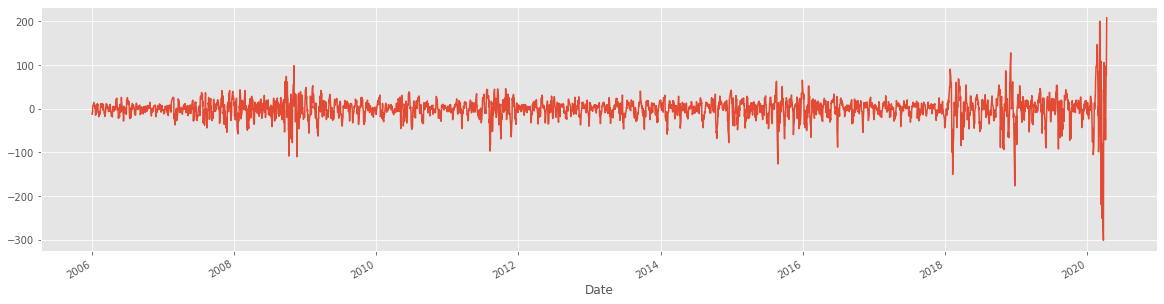

In [133]:

Z = spy5.iloc[:,3:4].values

spy5['zscore'] = sp.stats.zscore(Z,axis=0,ddof=0,nan_policy='propagate',)

spy5.zscore.plot(label='ZSCORE',figsize=(20,5),style='g',secondary_y=False,)
plt.show();
spy5.Close.plot(figsize=(20,5),style='b',secondary_y=False,);
plt.show()
spy5_decomp.trend.plot(figsize=(20,5),style='g',secondary_y=False,)
plt.show()

bk_cycles = sm.tsa.filters.bkfilter(spy5.Close,low=3,high=32,K=12)
bk_cycles.plot(figsize=(20,5),style='b',secondary_y=False,)

bk_cycles1 = sm.tsa.filters.bkfilter(result.trend,low=6,high=32,K=12)
bk_cycles1.plot(figsize=(20,5),style='r',secondary_y=False,)
spy5_decomp.cycle

bk_cycles1 = sm.tsa.filters.bkfilter(spy5_decomp.cycle,low=6,high=32,K=12)
bk_cycles1.plot(figsize=(20,5),style='y',secondary_y=True,)
plt.show()

spy5.Close.plot(figsize=(20,5),secondary_y=False,)

spy5['linreg'] = ta.linreg(spy5['High'],length=15,offset=None)
spy5.linreg.plot(figsize=(20,5),secondary_y=False,)

spy5['hma2'] = ta.ema(spy5['Close'], length=15)
spy5.hma2.plot(figsize=(20,5),secondary_y=True,)

result.trend.plot(figsize=(20,5),secondary_y=True, style='b')

plt.legend()


spy5_decomp.trend.plot(figsize=(20,5),style='g',secondary_y=False,)
plt.show()
spy5_decomp.cycle.plot(figsize=(20,5),secondary_y=False,)
plt.show()

# https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_cycles.html

In [134]:

ucarima = sm.tsa.UnobservedComponents(spy5.Close,'rwalk', autoregressive=6,cycle=True, stochastic_cycle=True, damped_cycle=True,)
# Here the powell method is used, since it achieves a
# higher loglikelihood than the default L-BFGS method
res_ucarima = ucarima.fit(method='powell', disp=False)
print(res_ucarima.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                            Unobserved Components Results                            
Dep. Variable:                         Close   No. Observations:                 3592
Model:                           random walk   Log Likelihood              -15995.130
                   + damped stochastic cycle   AIC                          32012.259
                                     + AR(6)   BIC                          32080.301
Date:                       Thu, 09 Apr 2020   HQIC                         32036.512
Time:                               17:32:49                                         
Sample:                                    0                                         
                                      - 3592                                         
Covariance Type:                         opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------

In [135]:
mod_uc = sm.tsa.UnobservedComponents(
    spy5.Close, 'rwalk',
    cycle=True, stochastic_cycle=True, damped_cycle=True,
)
# Here the powell method gets close to the optimum
res_uc = mod_uc.fit(method='powell', disp=False)
# but to get to the highest loglikelihood we do a
# second round using the L-BFGS method.
res_uc = mod_uc.fit(res_uc.params, disp=False)
print(res_uc.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                            Unobserved Components Results                            
Dep. Variable:                         Close   No. Observations:                 3592
Model:                           random walk   Log Likelihood              -15995.991
                   + damped stochastic cycle   AIC                          31999.982
Date:                       Thu, 09 Apr 2020   BIC                          32024.725
Time:                               17:32:53   HQIC                         32008.801
Sample:                                    0                                         
                                      - 3592                                         
Covariance Type:                         opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
sigma2.level      383.5311      3.241    118.336      0.00

In [136]:
fig, axes = plt.subplots(3, figsize=(20,13));
axes[0].set(title='Level/trend component')
axes[0].plot(spy5.Close.index, res_uc.level.smoothed, label='UC')
axes[0].plot(spy5.Close.index, res_ucarima.level.smoothed, label='UC-ARIMA(2,0)')
axes[0].plot(spy5trend, label='HP Filter')
axes[0].legend(loc='upper left')
#axes[0].grid()
axes[1].set(title='Cycle component')
axes[1].plot(spy5.Close.index, res_uc.cycle.smoothed, label='UC',)
axes[1].plot(spy5.Close.index, res_ucarima.autoregressive.smoothed, label='UC-ARIMA(2,0)')
axes[1].plot(spy5cycle, label='HP Filter')
axes[1].legend(loc='upper left')
#axes[1].grid()
axes[2].plot(spy5.zscore, label='Z-Score')
axes[2].set(title='Z-Score')
axes[2].legend(loc='upper left')
#axes[2].grid()


fig.tight_layout();

plt.show()



In [144]:
fig, axes = plt.subplots(1, figsize=(100,30));
plt.plot(spy5.Close.index, res_ucarima.autoregressive.smoothed, label='UC-ARIMA(2,0)')

https://github.com/theJollySin/scipy_con_2019/blob/master/modern_time_series_analysis/ModernTimeSeriesAnalysis/StateSpaceModels/2_Gaussian_HMM_INSTRUCTOR.ipynb

https://www.youtube.com/watch?v=v5ijNXvlC5A&list=TLPQMjIwMzIwMjATqNNWmd9kow&index=2

In [0]:
test1 = web.DataReader('^vix','yahoo',start= datetime.datetime(2017,1,27) ,end= datetime.datetime(2020,1,1),)
ts= np.diff(np.log(spy5.Close.values))

In [0]:
vals = np.expand_dims(vix.Close,1)
n_states = 3
model = GaussianHMM(n_components=n_states,n_iter=1000).fit(vals)
hidden_states= model.predict(vals)

In [147]:
hidden_states[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [148]:

np.bincount(hidden_states)

array([1391, 1766,  435])

https://www.quantstart.com/articles/hidden-markov-models-for-regime-detection-using-r/

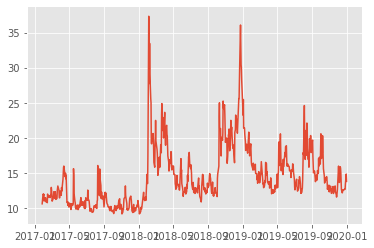

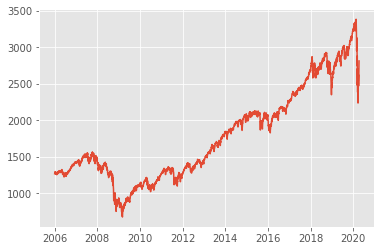

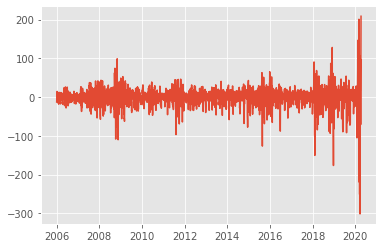

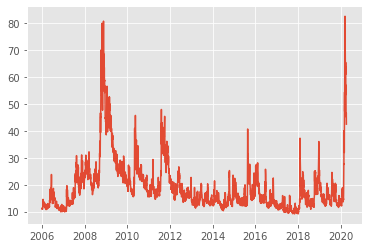

In [149]:
plt.plot(hidden_states)
plt.show()
plt.plot(test1.Close)
plt.show()
plt.plot(spy5.Close)
plt.show()
plt.plot(spy5_decomp.cycle)
plt.show()
plt.plot(vix.Close)


In [0]:

def fitHMM(vals, n_states):
    vals = np.reshape(vals,[len(vals),1])
    
    # fit Gaussian HMM to Q
    model = GaussianHMM(n_components=n_states, n_iter=1000).fit(vals)
     
    # classify each observation as state 0 or 1
    hidden_states = model.predict(vals)
 
    # fit HMM parameters
    mus = np.squeeze(model.means_)
    sigmas = np.squeeze(np.sqrt(model.covars_))
    transmat = np.array(model.transmat_)
    print(mus)
    print(sigmas)
    # re-order parameters in ascending order of mean of underlying distribution
    idx      = np.argsort(mus)
    mus      = mus[idx]
    sigmas   = sigmas[idx]
    transmat = transmat[idx, :][:, idx]
    
    state_dict = {}
    states = [i for i in range(n_states)]
    for i in idx:
        state_dict[i] = states[idx[i]]
    
    relabeled_states = [state_dict[h] for h in hidden_states]
    return (relabeled_states, mus, sigmas, transmat, model)

In [151]:
hidden_states, mus, sigmas, transmat, model = fitHMM(vix.Close.values, 3)

[13.10352523 20.18965813 39.02146531]
[ 1.73966421  3.20885768 12.37138944]


In [0]:
def plot_states(ts_vals, states, time_vals):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Time')
    ax1.set_ylabel('vix price',         color=color)
    ax1.plot(time_vals, ts_vals,      color=color)
    ax1.tick_params(axis='y',            labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Hidden state', color=color)  
    ax2.plot(time_vals,states,     color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.show()

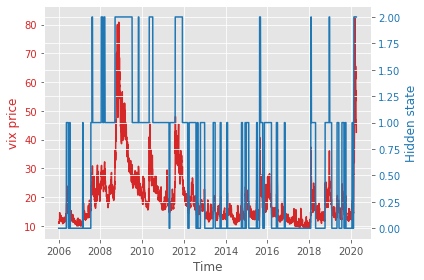

In [153]:

plot_states(vix.Close, hidden_states, vix.index)

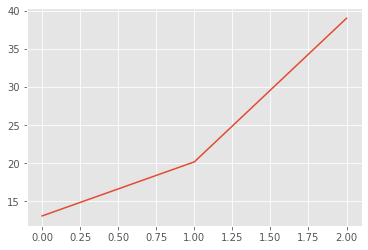

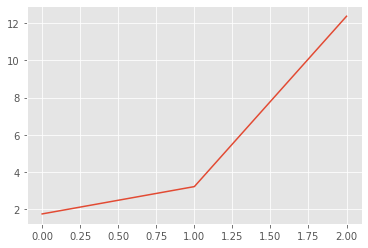

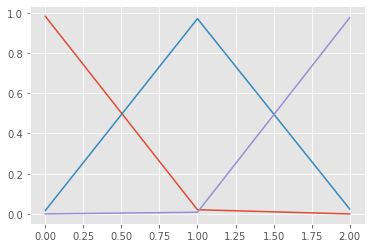

In [154]:
plt.plot(mus)
plt.show()
plt.plot(sigmas)
plt.show()
plt.plot(transmat)

In [155]:
res = np.squeeze(model.sample(1000)[0])
plt.plot(res)
plot_states(spy5_decomp.cycle, hidden_states, spy5_decomp.cycle.index)

In [156]:
hidden_states, mus, sigmas, transmat, model = fitHMM(res, 3)


[13.12542483 39.66628583 20.2253068 ]
[ 1.56157848 11.71898893  3.12635996]


In [0]:
def plot_states_no_time(ts_vals, states):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Year)')
    ax1.set_ylabel('Nile river flow',         color=color)
    ax1.plot( ts_vals,      color=color)
    ax1.tick_params(axis='y',            labelcolor=color)

    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('Hidden state', color=color)  
    ax2.plot(states,     color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  
    plt.show()

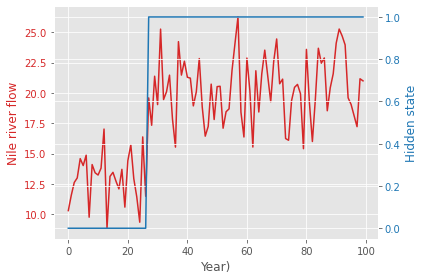

In [158]:

plot_states_no_time(res[:100], hidden_states[:100])

In [159]:
transmat

array([[9.77641277e-01, 1.96084148e-02, 2.75030797e-03],
       [1.90110417e-02, 9.73106277e-01, 7.88268180e-03],
       [1.64872499e-14, 1.68756328e-02, 9.83124367e-01]])

https://www.youtube.com/watch?v=x6_id26u3xk

https://github.com/EthanRosenthal/skits

In [0]:
#!pip install fbprophet
#from fbprophet import Prophet

https://facebook.github.io/prophet/docs/quick_start.html#python-api

https://www.tensorflow.org/tutorials/structured_data/time_series

In [0]:

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

https://qiskit-staging.mybluemix.net/documentation/aqua/finance/qiskit_finance.html#contributing-to-qiskit-finance

In [162]:
!pip install cesium 
!pip install xgboost

In [0]:
import cesium
import xgboost as xgb
import time

import scipy
from scipy.stats import pearsonr, spearmanr
from scipy.stats import skew

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [164]:

print(cesium.__version__)
print(xgb.__version__)
print(scipy.__version__)
print(sklearn.__version__)

0.9.12
0.90
1.4.1
0.22.2.post1


#Wiener filter 



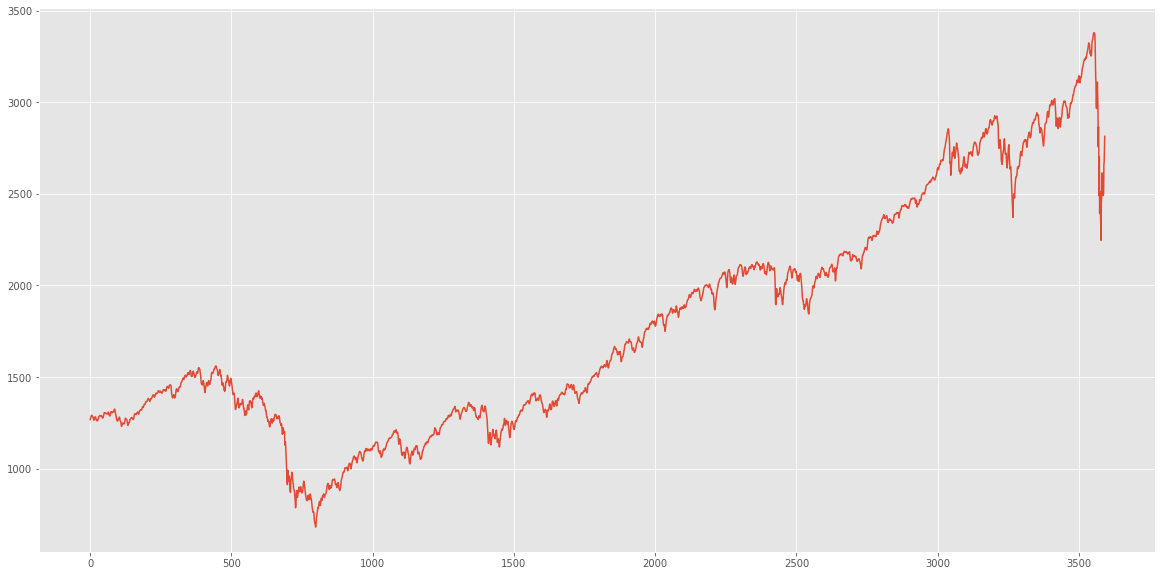

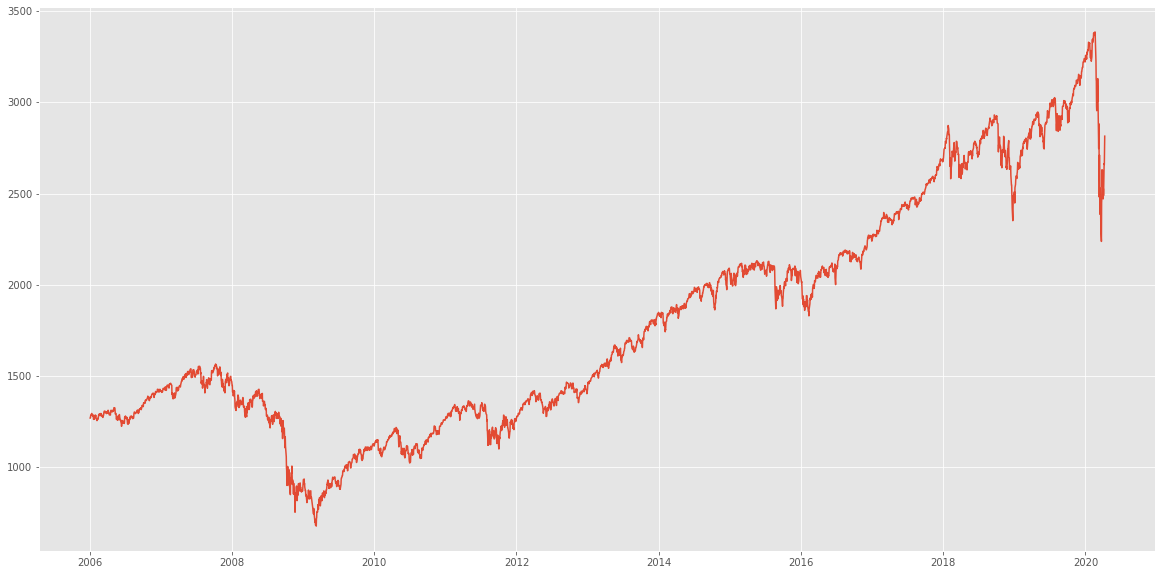

In [165]:

plt.rcParams['figure.figsize'] = [20, 10]

import scipy.signal as signal
import scipy.interpolate as si
u = spy5.Close.values
b1 = signal.wiener(im=u)
plt.plot(b1,)
plt.show()
plt.plot(spy5.Close)

In [166]:
X = b1
Y = spy5.Close.values
plt.show()
from sklearn.metrics import r2_score

sklearn.metrics.r2_score(Y,X,)

0.9998410892329681

In [167]:
adf =  sm.tsa.stattools.adfuller(spy5.Close,maxlag=None,regression='ctt',autolag='AIC',store=True,regresults=True)
adf

(-2.840781006925551,
 0.37615223649613355,
 {'1%': -4.3743797232752915,
  '10%': -3.5542858021962123,
  '5%': -3.834045704361391},
 <statsmodels.tsa.stattools.ResultsStore at 0x7fc0ba79bb00>)

##Stationarity with Rolling Normalized Standard Diviation

https://github.com/atefar2/ARIMA-Model-for-prediction/blob/master/Gold%20price.ipynb

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


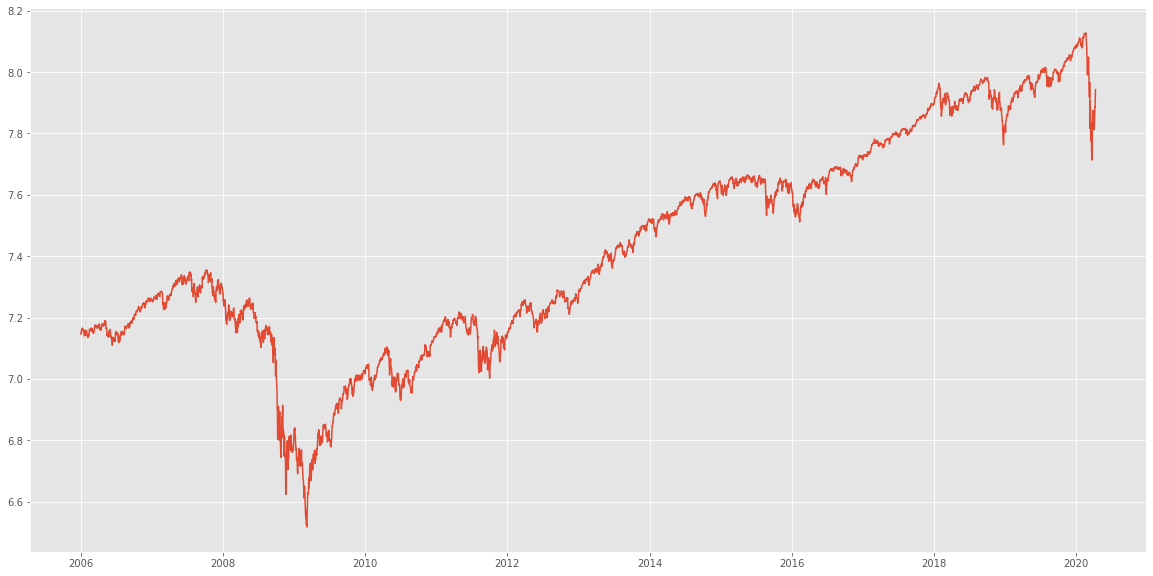

In [168]:
spy5.Close_logScale = np.log(spy5.Close)
plt.plot(spy5.Close_logScale)
plt.show()

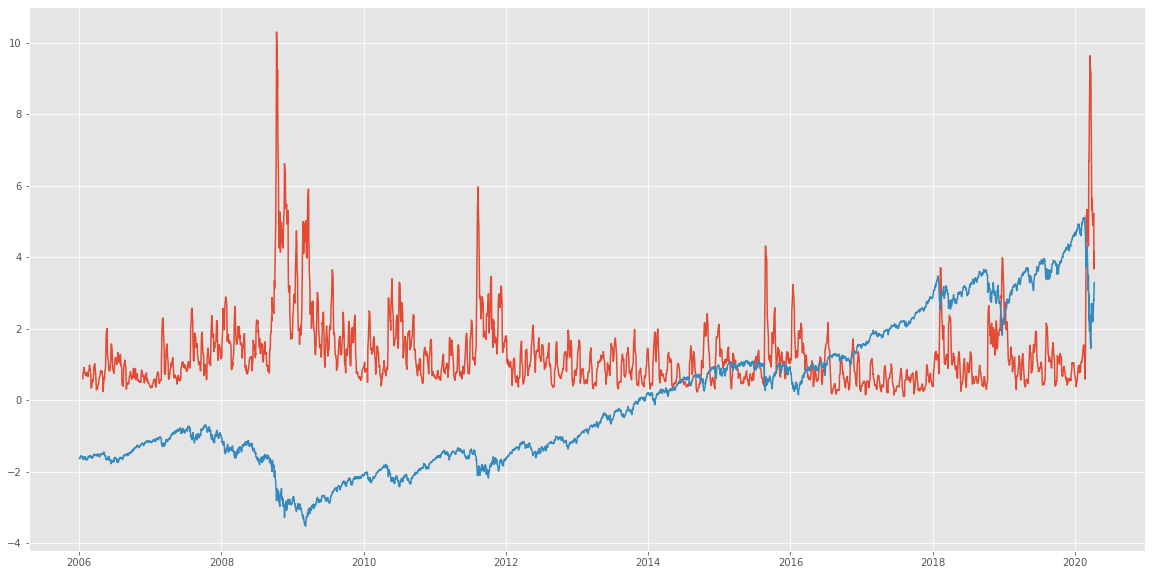

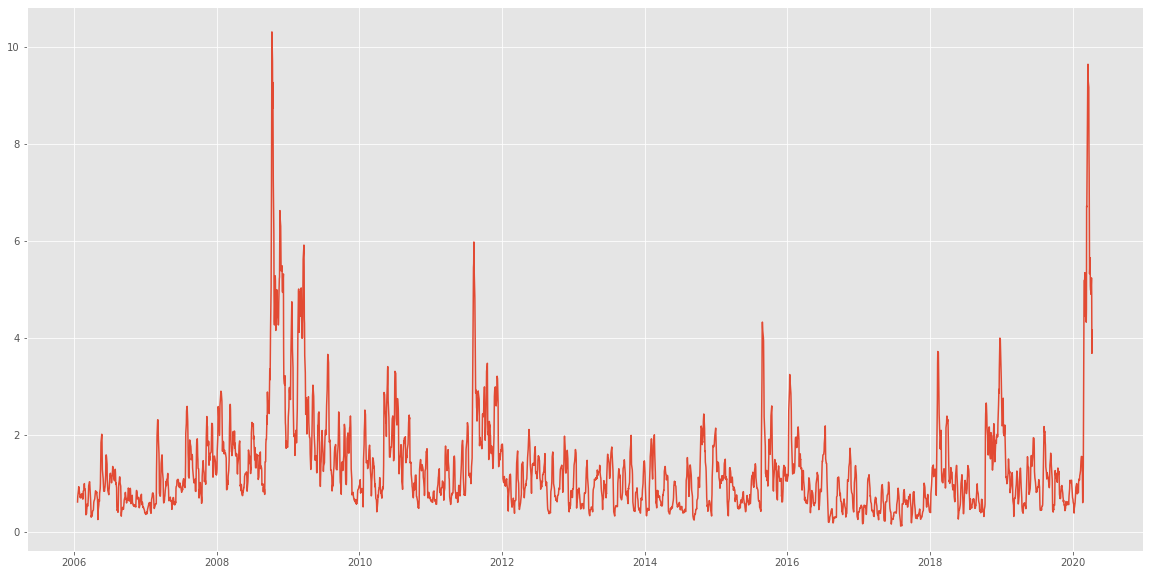

In [172]:
movingSTD = spy5.Close_logScale.rolling(window=12).mean()
spy5.Close_logScale = np.log(df.Close)
movingNSTD = spy5.Close_logScale.rolling(window=12).std()*100
plt.plot(spy5.index,movingNSTD,spy5.index,spy5.zscore*2)
#plt.plot(spy5.zscore)
plt.show()
plt.plot(movingNSTD)

In [173]:
kps = sm.tsa.stattools.kpss(spy5.Close,regression='c',lags=None,store=False,)
kps

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(9.992912582684236,
 0.01,
 30,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

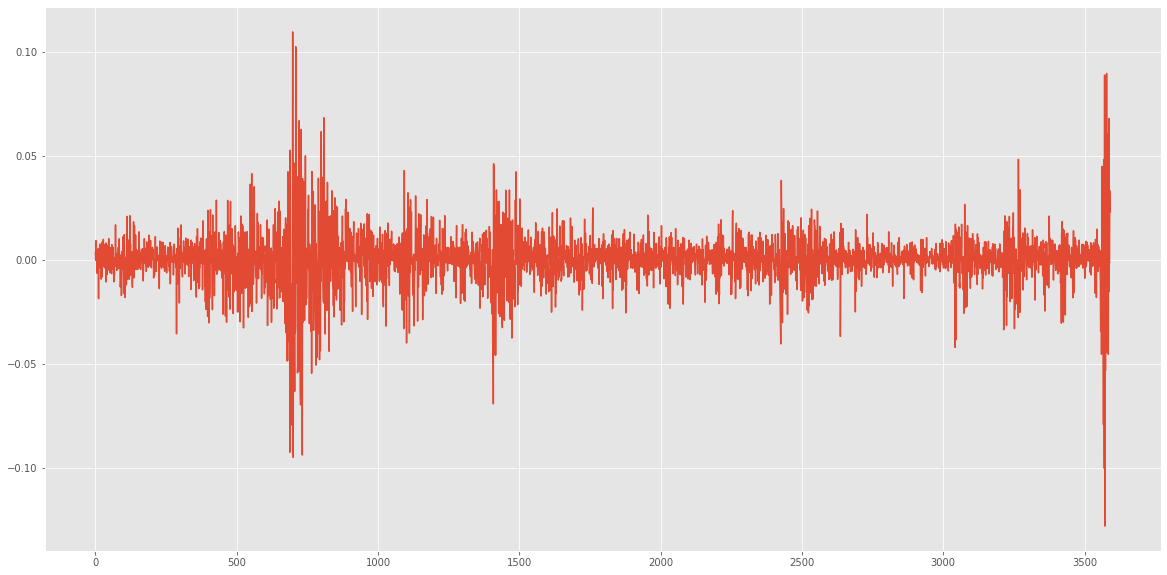

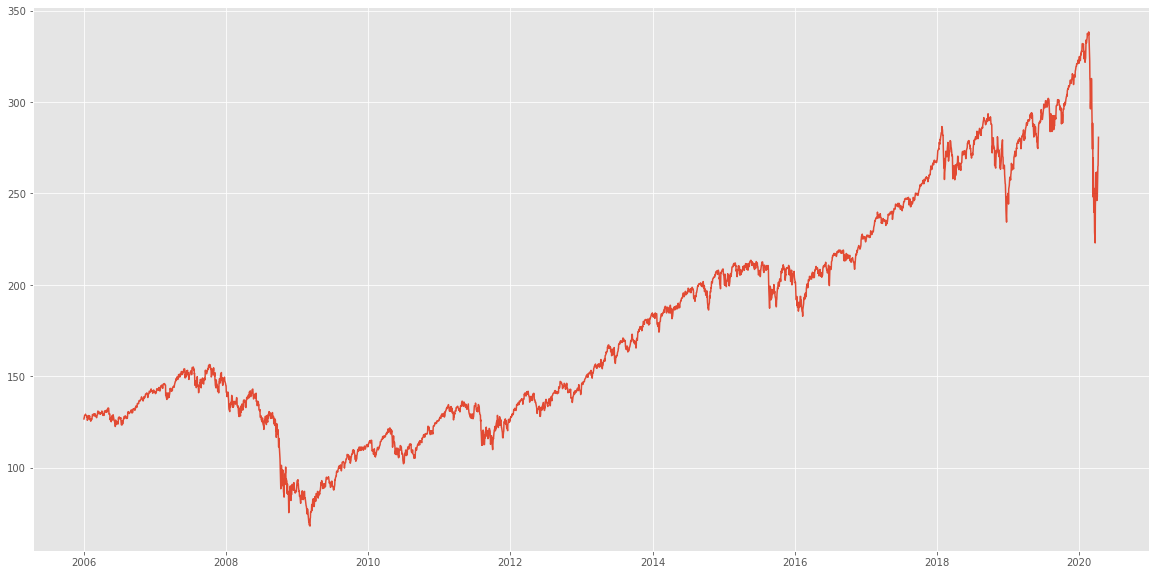

In [174]:
plt.plot(np.diff(np.log(spy5.Close.values)))
ts= np.diff(np.log(spy5.Close))
plt.show();
plt.plot(spy.Close)

In [175]:
!pip install mxnet
!pip install pyperf

In [0]:
import pyperf
import mxnet as mx 
from scipy.stats import pearsonr, spearmanr

In [177]:
!pip install Keras

##Python - LSTM for Time Series Prediction
https://www.youtube.com/watch?v=h8v9--50mdU&list=TLPQMjgwMzIwMjB5eLg1kHf1Xw&index=4

In [178]:
!pip install --upgrade tensorflow
!pip install Keras

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0rc2)


In [179]:
import keras
import tensorflow 
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from keras.preprocessing.sequence import TimeseriesGenerator
%matplotlib inline
%config inlineBackend.figure_format='retina'

register_matplotlib_converters()
rcParams['figure.figsize']=22,10
RANDOM_SEED = 42

spy5.head()

High          Low         Open  ...  trix  trix1    zscore
Date                                               ...                       
2006-01-03  1270.219971  1245.739990  1248.290039  ...   NaN    NaN -0.814045
2006-01-04  1275.369995  1267.739990  1268.800049  ...   NaN    NaN -0.806622
2006-01-05  1276.910034  1270.300049  1273.459961  ...   NaN    NaN -0.806590
2006-01-06  1286.089966  1273.479980  1273.479980  ...   NaN    NaN -0.787521
2006-01-09  1290.780029  1284.819946  1285.449951  ...   NaN    NaN -0.780034

[5 rows x 23 columns]

In [0]:
from tensorflow.python.keras.layers import Input, Dense, LSTM
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import RobustScaler
from tensorflow import keras
from keras import layers

In [181]:
spy5.isnull().sum()

High          0
Low           0
Open          0
Close         0
Volume        0
Adj Close     0
new           0
new1          0
hma          28
hma2         14
hma3         39
hma4         49
ema          14
fwma         11
cmo           8
cmo1         13
roc          12
linreg       14
tsi          25
tsi1         25
trix          5
trix1         5
zscore        0
dtype: int64

In [182]:
spy5 = spy5.fillna(method='pad')
spy5.isnull().sum()

High          0
Low           0
Open          0
Close         0
Volume        0
Adj Close     0
new           0
new1          0
hma          28
hma2         14
hma3         39
hma4         49
ema          14
fwma         11
cmo           8
cmo1         12
roc          12
linreg       14
tsi          25
tsi1         24
trix          5
trix1         5
zscore        0
dtype: int64

#Fourier Transform
https://github.com/saritmaitra/Natural-Gas-spot-price-prediction/blob/master/Natural%20Gas-XGBoost.ipynb

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


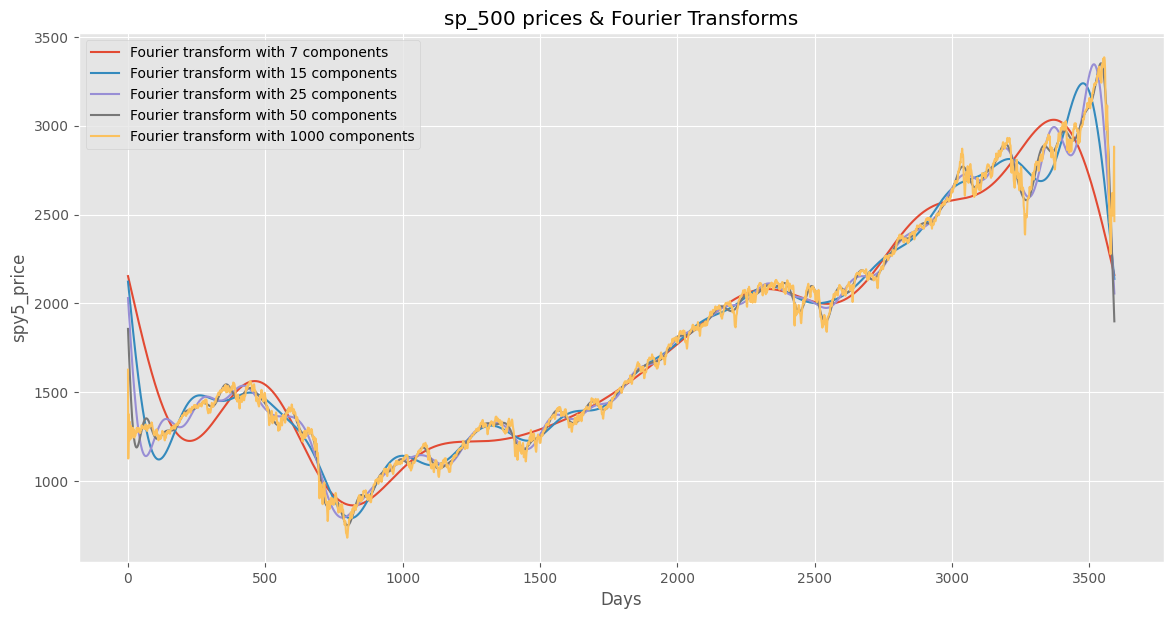

In [183]:
ng_fft = np.fft.fft(np.asarray(df['Close'].tolist()))
fft_df = pd.DataFrame({'fft':ng_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [7, 15, 25, 50, 1000]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))

plt.xlabel('Days')
plt.ylabel('spy5_price')
plt.title('sp_500 prices & Fourier Transforms')
plt.legend()
plt.show()

Volotolity 
https://github.com/theJollySin/scipy_con_2019/blob/master/modern_time_series_analysis/ModernTimeSeriesAnalysis/DeepLearning/Stocks/6_Stocks_INSTRUCTOR.ipynb

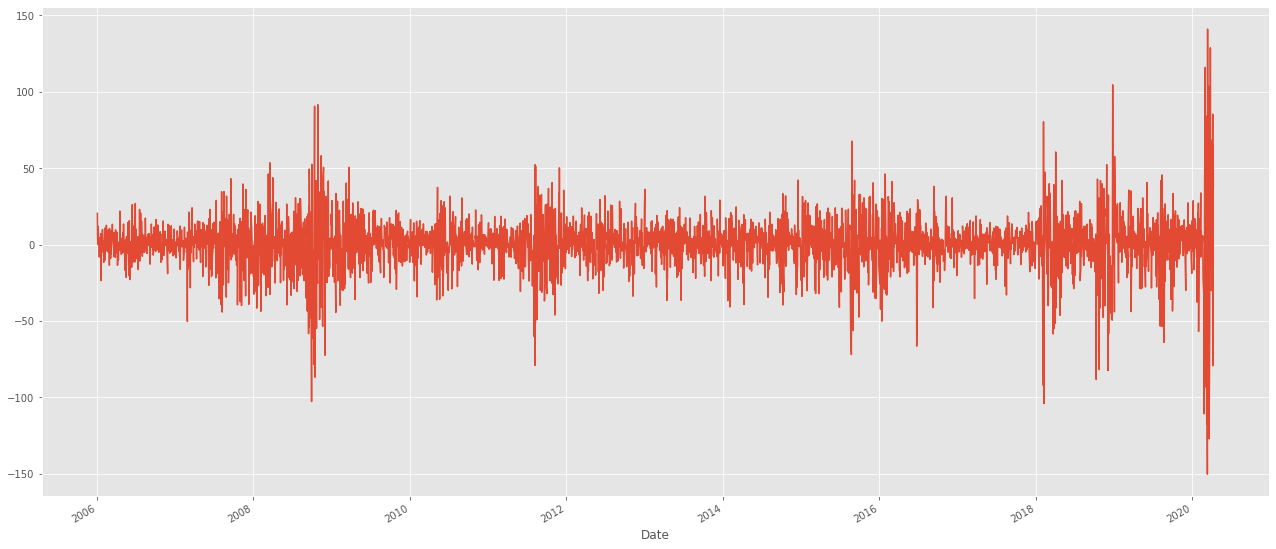

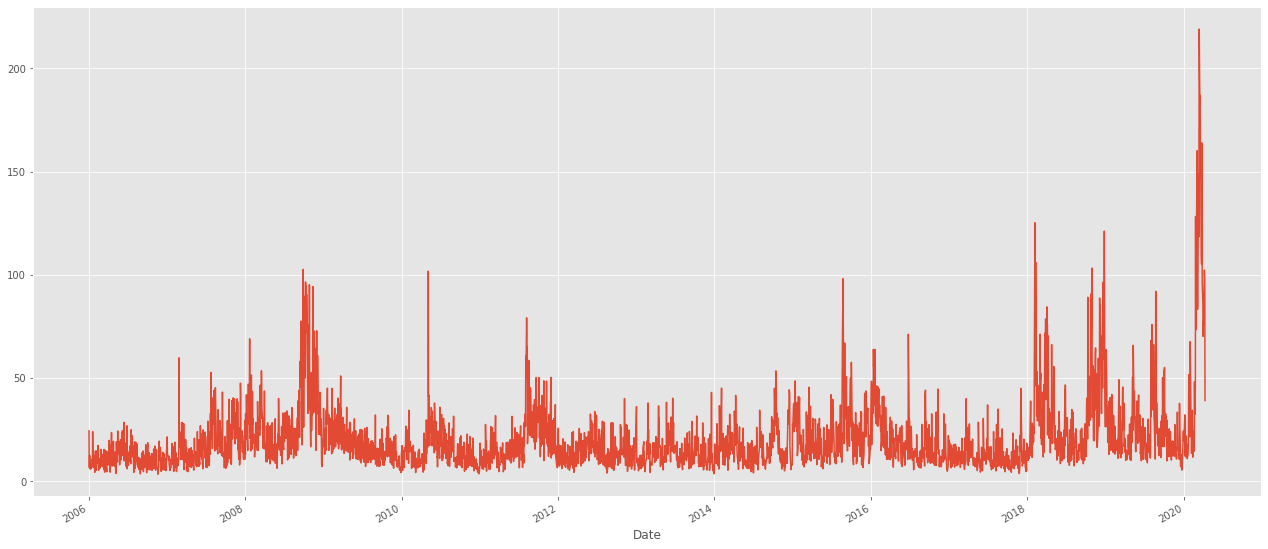

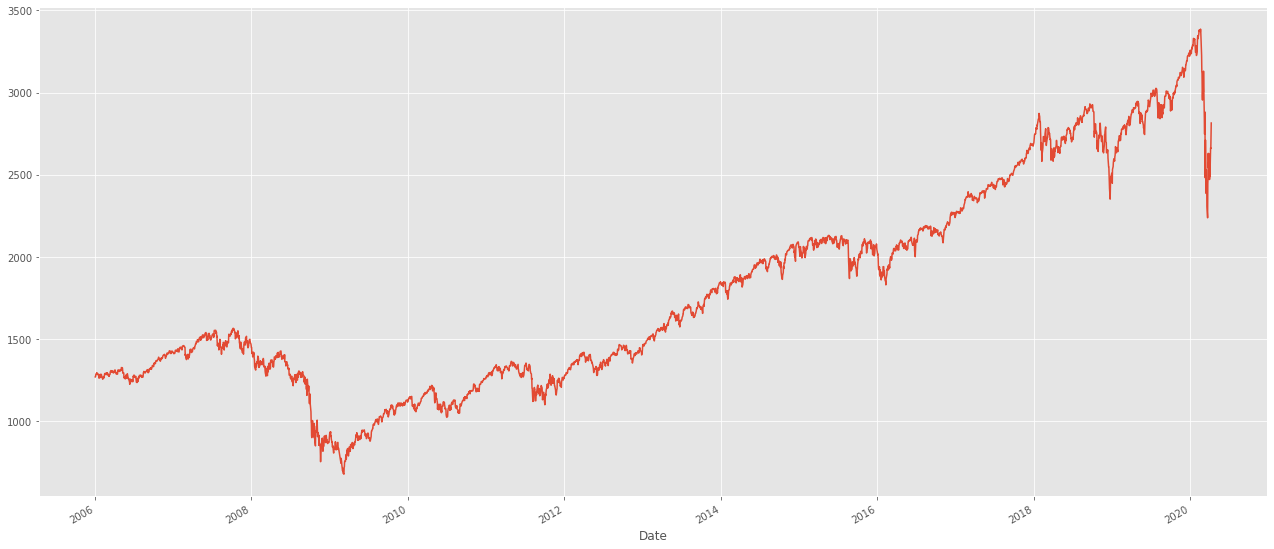

In [184]:
(spy5.Close - spy5.Open).plot()
plt.show()
(spy5.High - spy5.Low).plot()
plt.show()
spy5.Close.plot()

## Inferring the effect of an event using CausalImpact by Kay Brodersen

https://www.youtube.com/watch?v=GTgZfCltMm8

https://google.github.io/CausalImpact/CausalImpact.html

https://github.com/tcassou/causal_impact

https://github.com/dafiti/causalimpact

https://github.com/google/CausalImpact

https://github.com/kjblakemore/CausalImpact/blob/master/Notebook/GunControl.ipynb

https://github.com/jamalsenouci/causalimpact/blob/master/GettingStarted.ipynb